In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [10]:
# CSV 파일 불러오기
df = pd.read_csv("/content/sample_data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
# 컬렴명 확인
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
print("결측치 확인:\n", df.isnull().sum())

결측치 확인:
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [28]:
# 1. 데이터 전처리 (X: 특성, y: 타겟)

X = df.drop(['price', 'date'], axis=1).values
y = df["price"].values
print(X.dtype)
print(y.dtype)

float64
float64


In [29]:
# 3. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("data SHAPE : \n")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

data SHAPE : 

(17290, 19) (17290,)
(4323, 19) (4323,)


In [32]:
# 4. Defining the model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(64,input_shape=(19,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,465 (9.63 KB)

 Trainable params: 2,465 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# 5. Fitting
history = model.fit(x=X_train, y=y_train, epochs= 25, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1168053534457856.0000 - mse: 1168053534457856.0000 - val_loss: 89741093502976.0000 - val_mse: 89741093502976.0000
Epoch 2/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 191089621336064.0000 - mse: 191089621336064.0000 - val_loss: 177694473977856.0000 - val_mse: 177694473977856.0000
Epoch 3/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 121837593821184.0000 - mse: 121837593821184.0000 - val_loss: 914558943232.0000 - val_mse: 914558943232.0000
Epoch 4/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4845187629056.0000 - mse: 4845187629056.0000 - val_loss: 279133618176.0000 - val_mse: 279133618176.0000
Epoch 5/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 8716177375232.0000 - mse: 8716177375232.0000 - val_loss: 17042767872000.0000 - val_mse: 17042767872000.0000
Epoch 6/25
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 26368658112512.0000 - mse: 26368658112512.0000 - val_loss: 399129346048.0000 - val_mse: 3991

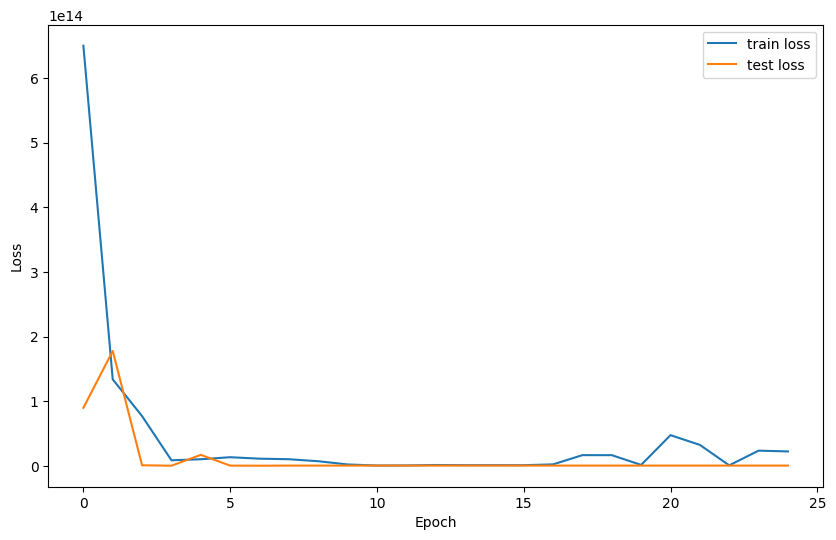

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 449068892160.0000 - mse: 449068892160.0000
Test Loss: [452713906176.0, 452713906176.0]


In [35]:
# 6. Training and validation Loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(25), history.history['loss'], label='train loss')
plt.plot(range(25), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")